## **Time series analysis on vegetable prices**

In this analysis we will determine what factors contribute to the fluctuation in prices of vegetables

Factors such as:
1) if seasons contribute to vegetable prices, (month of the year)?
2) if specific vegetables are bought more frequently than others?
3) what do the prices have in common with the vegetable type and what does it mean?

In [79]:
#Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp
import datetime as dt

#attain dataset from file
vegetable_prices = pd.read_csv('./dataset/prices.csv')

data = vegetable_prices
#test dataset for established connection
data.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


**Univariate analysis**

In [80]:
#Lets dentify the type of data we are dealing with in the dataframe:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


**Data format:**

1) lets format the data so we it is easier to use

In [81]:
#Method to convert datatypes in dataframe:
def convert_data_type(list_of_columns):
    for column in list_of_columns:
        data[column] = data[column].apply(float)

#List of columns we want to convert their datatypes:
list_of_columns = data.columns.to_list()[1:]

convert_data_type(list_of_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    float64
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    float64
 5   Brinjal                 287 non-null    float64
 6   Garlic                  287 non-null    float64
 7   Peas                    287 non-null    float64
 8   Methi                   287 non-null    float64
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    float64
dtypes: float64(10), object(1)
memory usage: 24.8+ KB


2) here we group our data to make it easier to analyze

In [82]:
#convert datatype of date column: 
data['Price Dates'] = pd.to_datetime(data['Price Dates'],format='mixed')

#split the data so we can have our quartery preformance (seasonal):
data['quarter'] = data['Price Dates'].dt.to_period('Q')


quarter_preformance=data.drop('Price Dates',axis=1)


**Determine measures of central tendency:**

we declare the mean, median, minimum and maximum values in the data:

In [83]:

quarter_average_price= quarter_preformance.groupby('quarter').mean().round(2)
quarter_common_price= quarter_preformance.groupby('quarter').median().round(2)
quarter_lowest_price= quarter_preformance.groupby('quarter').min().round(2)
quarter_highest_price= quarter_preformance.groupby('quarter').max().round(2)

In [84]:
quarter_average_price

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,
2023Q1,32.88,16.03,15.05,16.44,30.09,89.41,47.18,10.22,42.71,27.50
2023Q2,26.20,16.00,14.85,18.89,29.22,107.57,66.32,14.04,44.92,26.65
2023Q3,25.58,16.00,21.10,19.14,29.49,146.88,81.35,13.04,47.43,31.26
2023Q4,32.99,16.00,31.16,19.73,37.32,182.97,70.96,43.11,41.22,29.73
2024Q1,45.00,16.00,9.00,18.00,50.00,260.00,40.00,15.00,60.00,25.00


In [85]:
quarter_common_price

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,
2023Q1,33.00,16.0,12.0,15.0,25.0,80.0,30.0,8.0,40.0,30.0
2023Q2,27.00,16.0,12.5,20.0,25.0,95.0,60.0,15.0,40.0,25.0
2023Q3,24.25,16.0,22.0,20.0,30.0,160.0,75.0,12.0,40.0,30.0
2023Q4,32.00,16.0,30.0,20.0,32.5,170.0,60.0,15.0,40.0,30.0
2024Q1,45.00,16.0,9.0,18.0,50.0,260.0,40.0,15.0,60.0,25.0


In [86]:
quarter_lowest_price

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,
2023Q1,17.0,16.0,8.0,12.0,16.0,50.0,22.0,5.0,30.00,12.0
2023Q2,17.5,16.0,8.0,14.0,14.0,55.0,25.0,6.0,0.13,12.0
2023Q3,17.0,16.0,9.0,14.0,15.0,55.0,22.0,5.0,30.00,12.0
2023Q4,20.0,16.0,9.0,14.0,15.0,55.0,23.0,5.0,25.00,15.0
2024Q1,45.0,16.0,9.0,18.0,50.0,260.0,40.0,15.0,60.00,25.0


In [87]:
quarter_highest_price

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,
2023Q1,45.0,18.0,54.0,22.0,70.0,170.0,150.0,25.0,80.0,50.0
2023Q2,40.0,16.0,50.0,22.0,50.0,290.0,130.0,25.0,90.0,40.0
2023Q3,42.5,16.0,48.0,21.0,50.0,270.0,150.0,30.0,90.0,50.0
2023Q4,60.0,16.0,57.0,24.0,80.0,270.0,150.0,2000.0,80.0,40.0
2024Q1,45.0,16.0,9.0,18.0,50.0,260.0,40.0,15.0,60.0,25.0


# Create a bar graph to visualize the data:

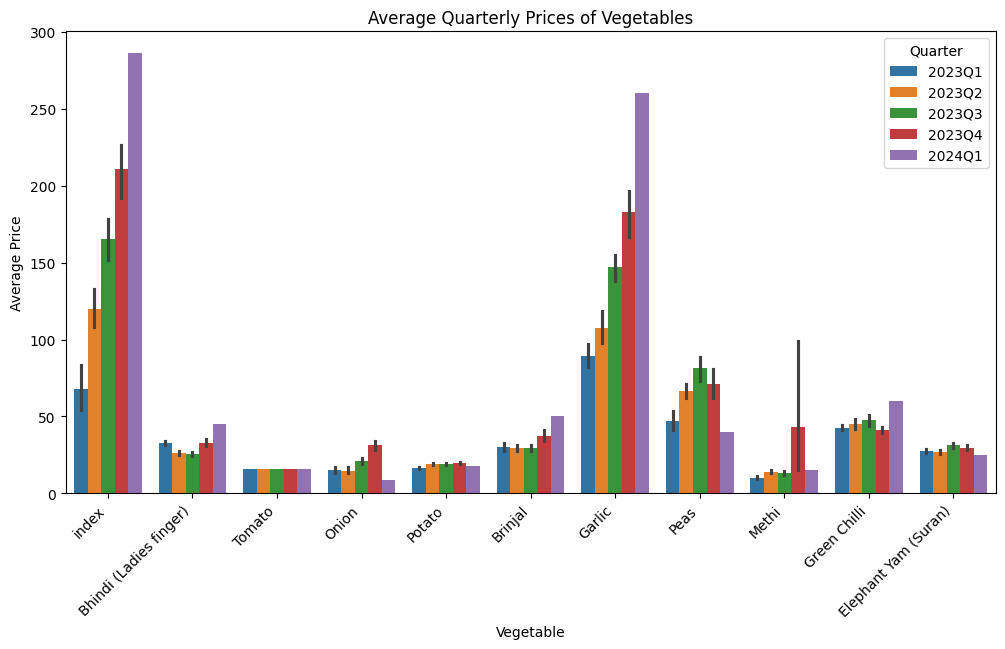

In [88]:
# Create the grouped bar graph using Seaborn
plt.figure(figsize=(12, 6))
sn.barplot(x='Vegetable', y='Average Price', hue='quarter', data=df_melted)
plt.xlabel("Vegetable")
plt.ylabel("Average Price")
plt.title("Average Quarterly Prices of Vegetables")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.legend(title='Quarter')
plt.show()